#Relatório - Acidentes de Trânsito em BRs.

##INTEGRANTES

Antonio Monteiro da Nóbrega Neto — 20230021330

Emanuel Messias Melquíades Batista — 20230021475

Fábio Soares de Lima - 20220128745

Natã Igor Pontes Teixeira Alcântara - 20220007258

##Introdução

###Motivação

1. *Segurança no Trânsito:* Estudar os dados sobre acidentes pode ajudar a descobrir os principais problemas e riscos. Assim, as autoridades podem tomar medidas melhores, como melhorar a sinalização e a infraestrutura das estradas.

2. *Políticas Públicas:* Entender esses dados ajuda a criar leis e campanhas que incentivem a direção segura e o controle de velocidade, o que pode reduzir o número de acidentes.

3. *Uso de Recursos:* Analisar as informações pode mostrar onde devemos investir mais dinheiro e esforços, focando nas áreas com mais acidentes para melhorar a resposta em emergências.

4. *Impacto na Sociedade e na Economia:* Avaliar as consequências dos acidentes—como gastos com saúde, danos e perda de vidas—ajuda a sociedade e o governo a entenderem a gravidade do problema, gerando mais apoio para iniciativas de prevenção.


###Objetivo

1. *Identificar e Classificar Causas de Acidentes:* Vamos analisar os dados para descobrir quais fatores, como imprudência, condições climáticas e o estado das estradas, estão por trás dos acidentes. Isso nos ajudará a entender melhor as situações mais perigosas e onde a polícia deveria melhor alocar os recursos para prevenção.

2. *Mapear Tendências de Acidentes:* Pode nos ajudar a criar estratégias de fiscalização e campanhas educativas mais eficazes.

3. *Avaliar a Gravidade dos Acidentes:* Vamos investigar quais tipos de acidentes resultam em mais lesões e mortes.

##Dados Usados

Os dados utilizados foram o da PRF relacionados ao estado da Paraíba. Abaixo, a importação dos dados e seu tratamento.

In [4]:
# Importando o Pandas, o Dataset, o Seaborn, CSV pra ler o Dataset, e o Numpy.
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/EmanuelMMB/Projeto-ICD/main/datatranPB.csv", sep =";")

##Pré-processamento

In [5]:
#Limpeza dos dados, as colunas removidas eram aquelas que não seria possível fazer análise, por não se tratar de valores numéricos.

dataset = dataset.drop(["id", "horario", "uf", "Nome da Origem", "br", "municipio", "ano", "ignorados"], axis=1)

#Organização dos dados de dia da semana, padronizando as diferentes formas que registraram.

dataset['dia_semana'] = dataset['dia_semana'].apply(
    lambda x: 'Segunda' if 'segunda' in x.lower() else
              'Terça' if 'terça' in x.lower() else
              'Quarta' if 'quarta' in x.lower() else
              'Quinta' if 'quinta' in x.lower() else
              'Sexta' if 'sexta' in x.lower() else
              'Sábado' if 'sábado' in x.lower() else
              'Domingo' if 'domingo' in x.lower() else x
)

#Organização dos dados de causas de acidente, padronizando as diferentes formas que registraram.

dataset['causa_acidente'] = dataset['causa_acidente'].apply(
    lambda x: 'Falta de Atenção' if 'falta de atenção' in x.lower() else
              'Velocidade Incompatível' if 'velocidade incompatível' in x.lower() else
              'Dormindo' if 'dormindo' in x.lower() else
              'Ingestão de Álcool' if 'ingestão de álcool' in x.lower() else
              'Defeito na Via' if 'defeito na via' in x.lower() else
              'Ultrapassagem Indevida' if 'ultrapassagem indevida' in x.lower() else
              'Não guardar distância de segurança' if 'condutor deixou de manter distância do veículo da frente' in x.lower() else x
)


contagem = dataset['causa_acidente'].value_counts()

dataset.describe()

,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos,veiculos
count,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000
mean,366.248594,2.245567,0.066430,0.622611,0.252054,1.100337,0.874665,1.783496
std,750.126757,1.571689,0.286057,0.925467,0.554734,1.301708,1.051356,0.861655
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,117.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,313.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
max,5226.000000,91.000000,7.000000,36.000000,7.000000,49.000000,40.000000,22.000000


##Respondendo as Perguntas Propostas.

###1. Quais são as principais causas dos acidentes de trânsito nas rodovias federais no Estado da Paraíba?

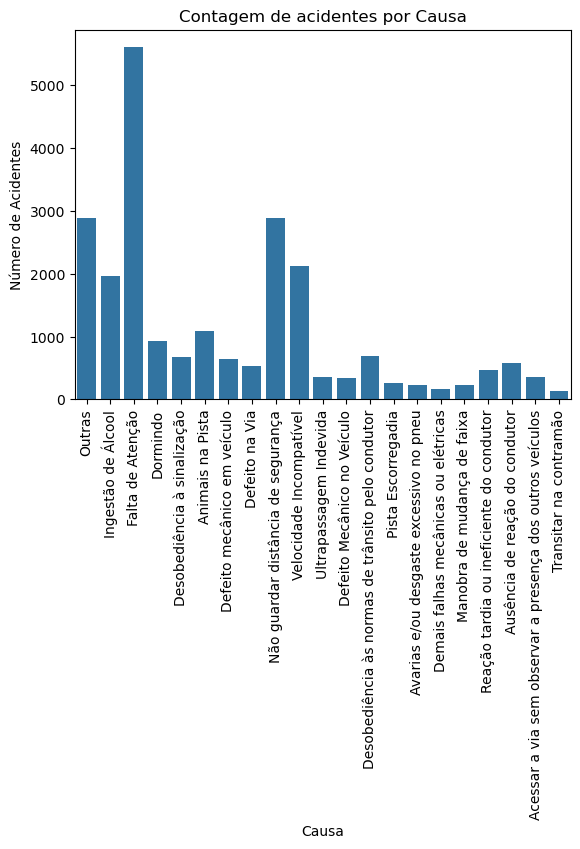

In [6]:
#Gráfico para visualizar a quantidade de acidentes, separados por causa.
sns.countplot(x=dataset['causa_acidente'].apply(lambda x: x if contagem[x] >= 100 else 'Outras'))

plt.title('Contagem de acidentes por Causa')
plt.xlabel('Causa')
plt.ylabel('Número de Acidentes')

plt.xticks(rotation=90)
plt.show()

###2.Qual o tipo de acidente que provoca maior lesão ou número de mortes?

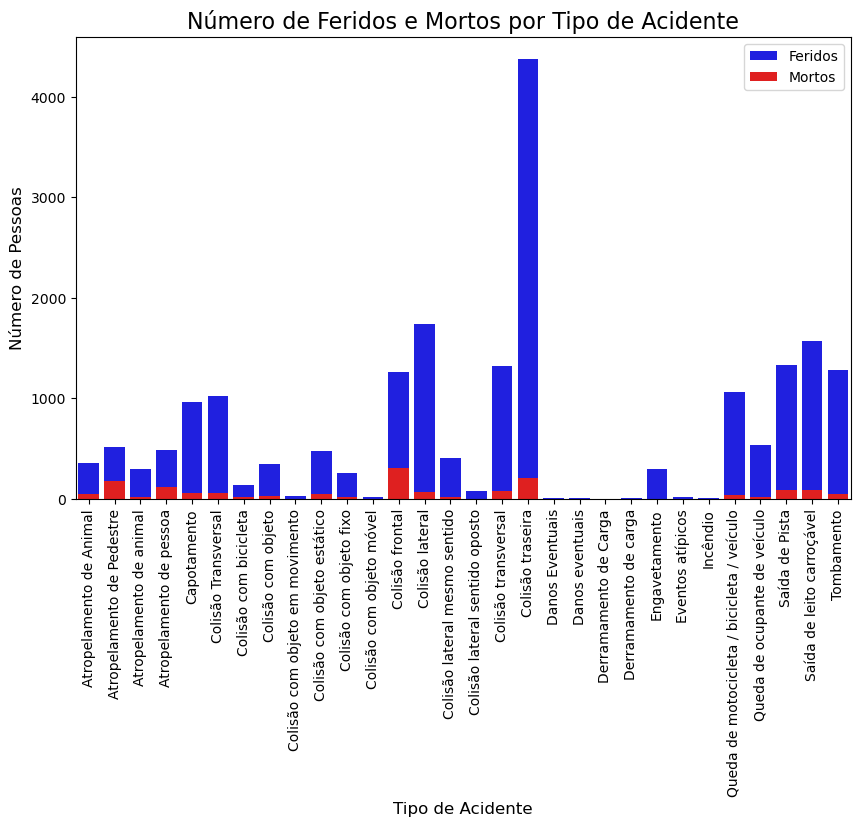

In [7]:
pergunta2 = dataset.groupby('tipo_acidente').agg(
    feridos=('feridos', 'sum'),
    mortos=('mortos', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='tipo_acidente', y='feridos', data=pergunta2, color='blue', label='Feridos')
sns.barplot(x='tipo_acidente', y='mortos', data=pergunta2, color='red', label='Mortos')

plt.title('Número de Feridos e Mortos por Tipo de Acidente', fontsize=16)
plt.xlabel('Tipo de Acidente', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(rotation=90)

plt.legend()
plt.show()

###3. Qual dia da semana ocorre mais acidentes?

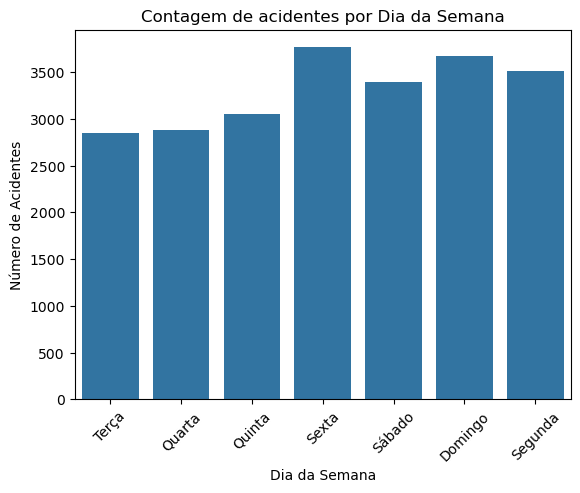

In [9]:
sns.countplot(x='dia_semana', data=dataset)

plt.title('Contagem de acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')

plt.xticks(rotation=45)
plt.show()

##Conclusão